In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import matplotlib.dates as mdates
import datetime as DT
import time
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib as mpl

#colors=['#436397','#3774a3','#3084ab', '#3394b0', '#43a3b2', '#59b2b3', '#73bfb4', '#8eccb4', '#aad9b7', '#c7e5bc','#e3f0c4', '#fffbd0']
colors=['#28326F', '#5F85C3','#65067A','#28A197','#D81E5B','#23CE6B','#FAA916']
df=pd.read_csv("C:/Users/Aaron/Untitled Folder/Assembly Code/outpatients2022.csv")
# Say, "the default sans-serif font is COMIC SANS"
mpl.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
mpl.rcParams['font.family'] = "sans-serif"
list_dates=['Dec 08',
     'Dec 09',
     'Dec 10',
     'Dec 11',
     'Dec 12',
     'Dec 13',
     'Dec 14',
     'Dec 15',
     'Dec 16',
     'Dec 17',
     'Dec 18',
     'Dec 19',
     'Dec 20',
     'Dec 21','Dec 22']

#Python program to reverse an array
def list_reverse(arr,size):
 
    #if only one element present, then return the array
    if(size==1):
        return arr
     
    #if only two elements present, then swap both the numbers.
    elif(size==2):
        arr[0],arr[1],=arr[1],arr[0]
        return arr
     
    #if more than two elements presents, then swap first and last numbers.
    else:
        i=0
        while(i<size//2):
 
    #swap present and preceding numbers at time and jump to second element after swap
            arr[i],arr[size-i-1]=arr[size-i-1],arr[i]
       
    #skip if present and preceding numbers indexes are same
            if((i!=i+1 and size-i-1 != size-i-2) and (i!=size-i-2 and size-i-1!=i+1)):
                arr[i+1],arr[size-i-2]=arr[size-i-2],arr[i+1]
            i+=2
        return arr

In [2]:
months=df['Quarter'].unique()
months[0:60:4]
specialty=df['Specialty'].unique()
trust=df['HSC Trust'].unique()
df.fillna(0)

,Unnamed: 0,Quarter,HSC Trust,Specialty,Under 9 Weeks,Between 9 and 52 Weeks,Over 52 Weeks,Total Waiting,Total waiting over 9 weeks for first outpatient appointment,Percent Over 9 Weeks,Percent Over 52 Weeks
0,1.0,31-Dec-22,Belfast,Accident & Emergency,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2.0,31-Dec-22,Belfast,Cardiac Surgery,59.0,16.0,0.0,75.0,16.0,21.3,0.0
2,3.0,31-Dec-22,Belfast,Cardiology,1273.0,1720.0,1531.0,4524.0,3251.0,71.9,33.8
3,4.0,31-Dec-22,Belfast,Chemical Pathology,58.0,47.0,5.0,110.0,52.0,47.3,4.5
4,5.0,31-Dec-22,Belfast,Clinical Genetics,323.0,192.0,1.0,516.0,193.0,37.4,0.2
...,...,...,...,...,...,...,...,...,...,...,...
7843,7844.0,30-Jun-08,Western,Chemical Pathology,0.0,0.0,0.0,29.0,0.0,20.7,0.0
7844,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7845,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7846,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
def clean_plot(path,label1, label2,label3,title1,savepath,listdates):
    df=pd.read_csv(path)
    months=df['Quarter'].unique()
    months[0:60:4]
    df.fillna(0)

    december=df.loc[(df["Quarter"]==(months[0:60:4][0]))
                 | (df["Quarter"]==(months[0:60:4][1]))
                    | (df["Quarter"]==(months[0:60:4][2]))
                       | (df["Quarter"]==(months[0:60:4][3]))
                          | (df["Quarter"]==(months[0:60:4][4]))
                             | (df["Quarter"]==(months[0:60:4][5]))
                                | (df["Quarter"]==(months[0:60:4][6]))
                                   | (df["Quarter"]==(months[0:60:4][7]))
                                      | (df["Quarter"]==(months[0:60:4][8]))
                                         | (df["Quarter"]==(months[0:60:4][9]))
                                            | (df["Quarter"]==(months[0:60:4][10]))
                                               | (df["Quarter"]==(months[0:60:4][11]))
                                                  | (df["Quarter"]==(months[0:60:4][12]))
                                                     | (df["Quarter"]==(months[0:60:4][13]))
                                                       | (df["Quarter"]==(months[0:60:4][14]))]
    total_waiting=[]
    waiting_over_9=[]
    waiting_over_52=[]
    #print(len(months[0:60:4]))
    for i in range(0, len(months[0:60:4])):
        dec_tot=sum(december.loc[(df["Quarter"]==(months[0:60:4][i]))]['Total Waiting'].astype(int))
        dec_tot_over_9=sum(december.loc[(df["Quarter"]==(months[0:60:4][i]))]['Total waiting over 9 weeks for first outpatient appointment'].astype(int))
        dec_tot_over_52=sum(december.loc[(df["Quarter"]==(months[0:60:4][i]))]['Over 52 Weeks'].fillna(0).astype(int))
        
        total_waiting.append(dec_tot)
        waiting_over_9.append(dec_tot_over_9)
        waiting_over_52.append(dec_tot_over_52)
    
    c=list_dates
    print(c)
    a=list_reverse(total_waiting,len(total_waiting))
    b=list_reverse(waiting_over_9,len(waiting_over_9))
    q=list_reverse(waiting_over_52, len(waiting_over_52))
    #c=list_reverse(list_dates,len(list_dates))
    b[0]=5831
    b[1]=15715
    b[2]=54472
    b[3]=59378
    b[4]=35336
    b[5]=38261
    b[6]=95437
    
    percent_waiting=[]
    percent_waiting_52=[]
    for i in range(0, len(b)):
        percent_waiting.append(100*(b[i]/a[i]))
        percent_waiting_52.append(100*(q[i]/a[i]))
        
    d=percent_waiting
    g=percent_waiting_52
    fig, ax = plt.subplots(figsize=(14,8))

    major_ticks = np.arange(0,420001,100000)
    minor_ticks = np.arange(0,420001,50000)
    ax.set_ylim([0,420001])
    f=list_dates.copy()
    f.pop(0)
    f.pop(0)
    f.pop(0)
    f.pop(0)
    f.pop(0)
    f.pop(0)
    f.pop(0)
    q.pop(0)
    q.pop(0)
    q.pop(0)
    q.pop(0)
    q.pop(0)
    q.pop(0)
    q.pop(0)
        
    
    
    #print(f,q,c,a)
    fmt = '{x:,.0f}'
    tick = mtick.StrMethodFormatter(fmt)
    ax.yaxis.set_major_formatter(tick) 
    pl1 = plt.errorbar(c,a, fmt='.',color=colors[0], label=label1,markersize=18)
    pl2 = plt.errorbar(c,b, fmt='^',color=colors[1], label=label2,markersize=10)
    pl3 = plt.errorbar(f,q, fmt='d',color=colors[2], label=label3,markersize=10)
    
    pl5 = plt.plot(c,a,linestyle='solid',color=colors[0])
    pl6 = plt.plot(c,b,linestyle='--',color=colors[1])
    pl6 = plt.plot(f,q,linestyle='-.',color=colors[2])
    
    ax.legend(loc='upper center', frameon=False, fontsize=18,ncol=1,bbox_to_anchor=(0.5,1.15))

    #ax.set_yticks(major_ticks,color='darkgrey')
    #ax.set_yticks(minor_ticks, minor=True)

    #ax.yaxis.grid(True, which='major',color='darkgrey')
    #ax.yaxis.grid(True, which='minor',color='darkgrey', alpha=0.5)

    plt.yticks(rotation=0, fontsize=16)
    plt.xticks(rotation=45,ha='right', rotation_mode="anchor", fontsize=16)
    ax.set_axisbelow(True)

    right_side = ax.spines["right"]
    top_side = ax.spines["top"]
    left_side = ax.spines["left"]
    bottom_side=ax.spines["bottom"]
    right_side.set_visible(False)
    top_side.set_visible(False)
    left_side.set_visible(False)
    left_side.set_visible(False)
    ax.tick_params(axis='x', which='both', length=5)
    ax.tick_params(axis='y', which='both', length=0)

    for i in range(0,len(total_waiting)):
        if i<len(total_waiting)-1:
            ax.annotate("{:,}".format(total_waiting[i]), xy=(i-0.4, total_waiting[i]+25000), fontsize=14, alpha=0.75)
            ax.annotate("{:,}".format(waiting_over_9[i]), xy=(i-0.4, waiting_over_9[i]+25000), fontsize=14, alpha=0.75)
            
        else:
            ax.annotate("{:,}".format(total_waiting[i]), xy=(i-0.4, total_waiting[i]+10000), fontsize=14, alpha=0.75)
            ax.annotate("{:,}".format(waiting_over_9[i]), xy=(i-0.4, waiting_over_9[i]+25000), fontsize=14, alpha=0.75)
    
    for i in range(0,len(waiting_over_52)):
        if i<len(waiting_over_52)-1:
            ax.annotate("{:,}".format(waiting_over_52[i]), xy=(i+7-0.4, waiting_over_52[i]+25000), fontsize=14, alpha=0.75)
        else:            
            ax.annotate("{:,}".format(waiting_over_52[i]), xy=(i+7-0.4, waiting_over_52[i]+25000), fontsize=14, alpha=0.75)
            
            
    plt.tick_params(labelleft=False, left=False)
    for i in range(0, len(total_waiting)+1):
        plt.axvline(x=i-0.5,alpha=0.1, linestyle='--')
    
    plt.title(title1, fontsize=22, pad=65)
    plt.savefig(savepath,bbox_inches='tight')
    plt.plot()
    fig.tight_layout()
    return a,b,c,d,q,g,f

['Dec 08', 'Dec 09', 'Dec 10', 'Dec 11', 'Dec 12', 'Dec 13', 'Dec 14', 'Dec 15', 'Dec 16', 'Dec 17', 'Dec 18', 'Dec 19', 'Dec 20', 'Dec 21', 'Dec 22']


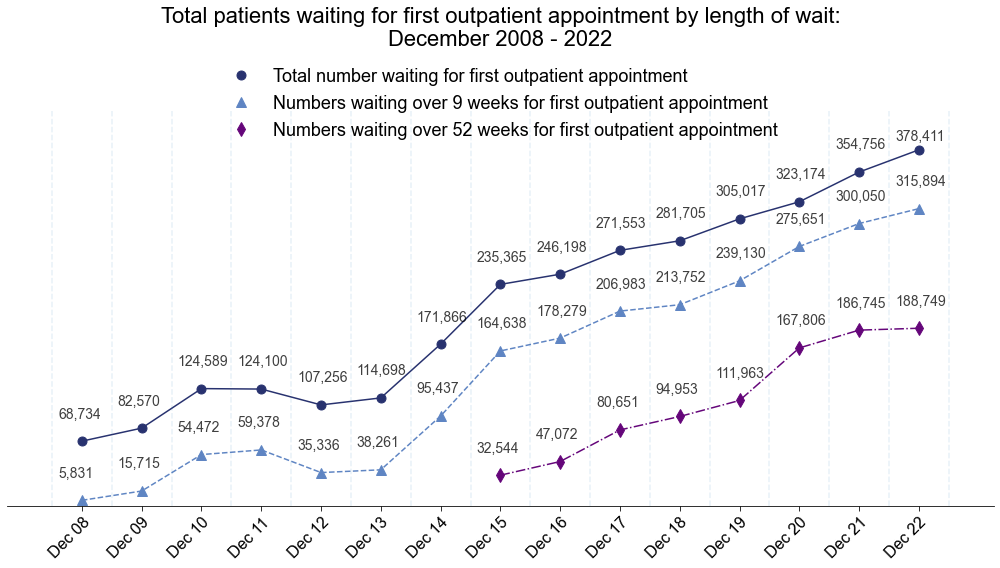

In [4]:
path="C:/Users/Aaron/Untitled Folder/Assembly Code/outpatients2022.csv"
savepath="C:/Users/Aaron/Untitled Folder/Assembly Code/Janice/image1.png"
label1='Total number waiting for first outpatient appointment'
label2='Numbers waiting over 9 weeks for first outpatient appointment'
label3= 'Numbers waiting over 52 weeks for first outpatient appointment'
title1='Total patients waiting for first outpatient appointment by length of wait:\nDecember 2008 - 2022'
a,b,c,d,q,g,f=clean_plot(path,label1, label2,label3, title1,savepath,list_dates)

In [5]:
g.pop(0)
g.pop(0)
g.pop(0)
g.pop(0)
g.pop(0)
g.pop(0)
g.pop(0)

0.0

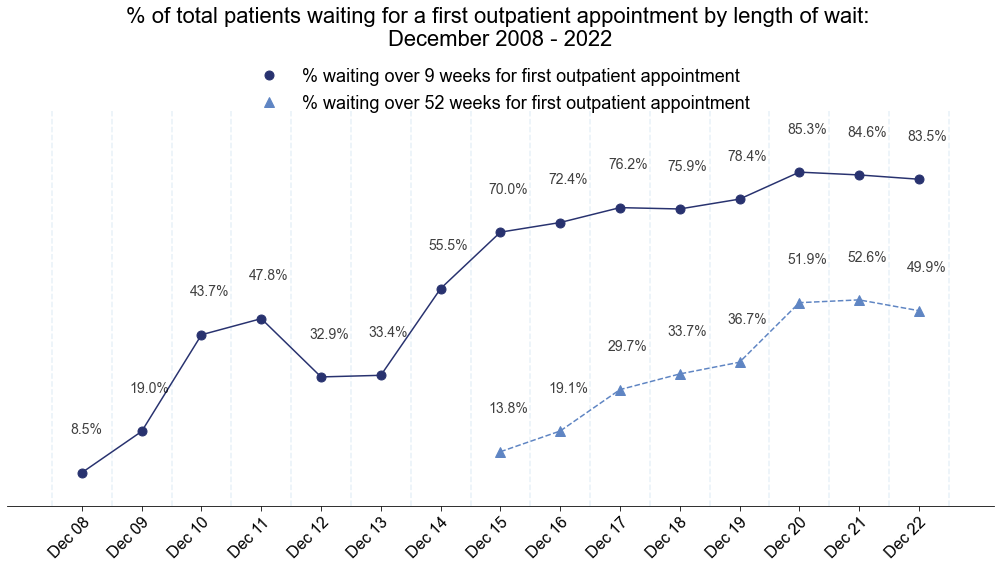

In [6]:
label2='% waiting over 9 weeks for first outpatient appointment'
label3= '% waiting over 52 weeks for first outpatient appointment'

fig, ax = plt.subplots(figsize=(14,8))
major_ticks = np.arange(0,101,10)
minor_ticks = np.arange(0,101,5)
ax.set_ylim([0,101])
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
pl1 = plt.errorbar(c,d, fmt='.',color=colors[0],label=label2, markersize=18)
pl2 = plt.errorbar(f,g, fmt='^',color=colors[1],label=label3,markersize=10)
pl5 = plt.plot(c,d,linestyle='solid',color=colors[0])
pl4 = plt.plot(f,g,linestyle='--',color=colors[1])
#ax.legend(loc='upper center', frameon=False, fontsize=16,ncol=1,bbox_to_anchor=(0.5,1.15))
plt.yticks(rotation=0, fontsize=16)
plt.xticks(rotation=45,ha='right', rotation_mode="anchor", fontsize=16)
ax.set_axisbelow(True)
right_side = ax.spines["right"]
top_side = ax.spines["top"]
left_side = ax.spines["left"]
bottom_side=ax.spines["bottom"]
right_side.set_visible(False)
top_side.set_visible(False)
left_side.set_visible(False)
left_side.set_visible(False)
ax.tick_params(axis='x', which='both', length=5)
ax.tick_params(axis='y', which='both', length=0)
for i in range(0,len(d)):
    ax.annotate(str(round(d[i],1))+'%', xy=(i-0.2,d[i]+10), fontsize=14, alpha=0.75)
for i in range(0,len(g)):
    ax.annotate(str(round(g[i],1))+'%', xy=(i+7-0.2,g[i]+10), fontsize=14, alpha=0.75)
plt.tick_params(labelleft=False, left=False)
for i in range(0, len(d)+1):
    plt.axvline(x=i-0.5,alpha=0.1, linestyle='--')
ax.legend(loc='upper center', frameon=False, fontsize=18,ncol=1,bbox_to_anchor=(0.5,1.15))
plt.title('% of total patients waiting for a first outpatient appointment by length of wait: \nDecember 2008 - 2022', fontsize=22, pad=65)
plt.savefig('C:/Users/Aaron/Untitled Folder/Assembly Code/Janice/image2.png',bbox_inches='tight')
plt.plot()
fig.tight_layout()


In [7]:
december=df.loc[(df["Quarter"]==(months[0:60:4][0]))
                 | (df["Quarter"]==(months[0:60:4][1]))
                    | (df["Quarter"]==(months[0:60:4][2]))
                       | (df["Quarter"]==(months[0:60:4][3]))
                          | (df["Quarter"]==(months[0:60:4][4]))
                             | (df["Quarter"]==(months[0:60:4][5]))
                                | (df["Quarter"]==(months[0:60:4][6]))
                                   | (df["Quarter"]==(months[0:60:4][7]))
                                      | (df["Quarter"]==(months[0:60:4][8]))
                                         | (df["Quarter"]==(months[0:60:4][9]))
                                            | (df["Quarter"]==(months[0:60:4][10]))
                                               | (df["Quarter"]==(months[0:60:4][11]))
                                                  | (df["Quarter"]==(months[0:60:4][12]))
                                                     | (df["Quarter"]==(months[0:60:4][13]))
                                                       | (df["Quarter"]==(months[0:60:4][14]))]



specialties=list(df['Specialty'].unique())
ratio_list=[]
specialties_list=[]
for i in range(0, len(specialties)):
    totwait=december.loc[(df["Quarter"]==(months[0:60:4][0]))]['Total Waiting']
    totwait9=december.loc[(df["Quarter"]==(months[0:60:4][0]))]['Total waiting over 9 weeks for first outpatient appointment']

    
    num=sum(totwait.loc[df["Specialty"]==specialties[i]])
    num2=sum(totwait9.loc[df["Specialty"]==specialties[i]])
    if num!=0:
        ratio=num2/num
    else:
        ratio=0
    ratio_list.append(ratio)
    specialties_list.append(specialties[i])
    
percentile_list = pd.DataFrame(
    {'% waiting over 9 weeks': ratio_list,
     'Specialty':specialties_list,
     'Month':months[0:60:4][0],
    })


percentile_list.sort_values(by='% waiting over 9 weeks', ascending=False)

percentile_list.to_csv('C:/Users/Aaron/Untitled Folder/Assembly Code/Janice/over9.csv', encoding='utf-8', index=False)


In [8]:
def data_get(stringy):
    perc=[]
    for i in range(0, len(months[0:60:4])):
        percent=sum(december.loc[(df["Specialty"]==stringy) & (df["Quarter"]==(months[0:60:4][i]))]['Total waiting over 9 weeks for first outpatient appointment'])/sum(december.loc[(df["Specialty"]==stringy) & (df["Quarter"]==(months[0:60:4][i]))]['Total Waiting'])
        #print(percent)
        perc.append(round((100*percent),1))
    percentile_list2 = pd.DataFrame(
        {'% waiting over 9 weeks': perc,
         'Month':months[0:60:4],
        })
    #percentile_list2 = percentile_list2[percentile_list2.Month != '31-Dec-15']
    percentile_list2 = percentile_list2[percentile_list2.Month != '31-Dec-14']
    percentile_list2 = percentile_list2[percentile_list2.Month != '31-Dec-13']
    percentile_list2 = percentile_list2[percentile_list2.Month != '31-Dec-12']
    percentile_list2 = percentile_list2[percentile_list2.Month != '31-Dec-11']
    percentile_list2 = percentile_list2[percentile_list2.Month != '31-Dec-10']
    percentile_list2 = percentile_list2[percentile_list2.Month != '31-Dec-09']
    percentile_list2 = percentile_list2[percentile_list2.Month != '31-Dec-08']
    
    return percentile_list2.iloc[::-1]

rheuma=data_get('Rheumatology')

oral=data_get("Oral Surgery")

neuro=data_get("Neurology")

plastic=data_get("Plastic Surgery")

painmgt=data_get("Pain Management")

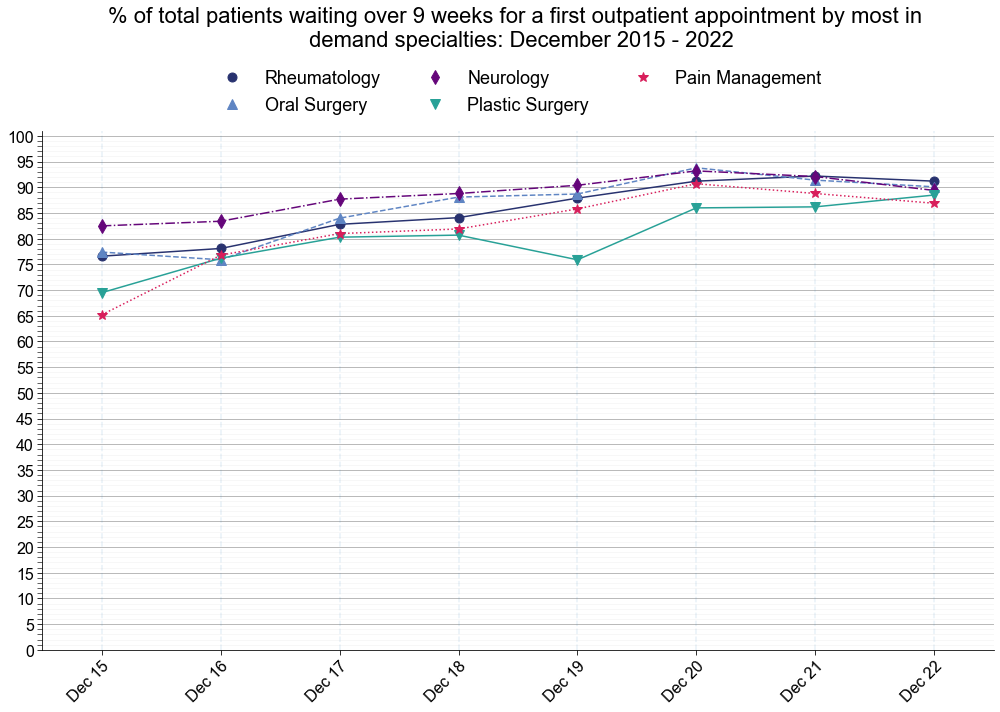

In [9]:
fig, ax = plt.subplots(figsize=(14,10))

major_ticks = np.arange(0,101,5)
minor_ticks = np.arange(0,101,1)
dates=['Dec 15','Dec 16','Dec 17','Dec 18','Dec 19','Dec 20','Dec 21','Dec 22']

ax.set_xlim([-0.5,7.5])

#fmt = '{x:,.0f}'
#tick = mtick.StrMethodFormatter(fmt)
#ax.yaxis.set_major_formatter(tick) 
#e=list_reverse(c,len(c))
pl1 = plt.errorbar(dates,rheuma['% waiting over 9 weeks'], label='Rheumatology', fmt='.',color=colors[0],markersize=18)
pl5 = plt.plot(dates,rheuma['% waiting over 9 weeks'],linestyle='solid',color=colors[0])

pl1 = plt.errorbar(dates,oral['% waiting over 9 weeks'], label='Oral Surgery', fmt='^',color=colors[1],markersize=10)
pl5 = plt.plot(dates,oral['% waiting over 9 weeks'],linestyle='--',color=colors[1])

pl1 = plt.errorbar(dates,neuro['% waiting over 9 weeks'], label='Neurology', fmt='d',color=colors[2],markersize=10)
pl5 = plt.plot(dates,neuro['% waiting over 9 weeks'],linestyle='-.',color=colors[2])

pl1 = plt.errorbar(dates,plastic['% waiting over 9 weeks'], label='Plastic Surgery', fmt='v',color=colors[3],markersize=10)
pl5 = plt.plot(dates,plastic['% waiting over 9 weeks'],linestyle='-',color=colors[3])

pl1 = plt.errorbar(dates,painmgt['% waiting over 9 weeks'], label='Pain Management', fmt='*',color=colors[4],markersize=10)
pl5 = plt.plot(dates,painmgt['% waiting over 9 weeks'],linestyle=':',color=colors[4])

ax.legend(loc='upper center', frameon=False, fontsize=18,ncol=3,bbox_to_anchor=(0.5,1.15))
plt.yticks(rotation=0, fontsize=16)
plt.xticks(rotation=45,ha='right', rotation_mode="anchor", fontsize=16)
ax.set_axisbelow(True)
right_side = ax.spines["right"]
top_side = ax.spines["top"]
#left_side = ax.spines["left"]
bottom_side=ax.spines["bottom"]
right_side.set_visible(False)
top_side.set_visible(False)
#left_side.set_visible(True)
#left_side.set_visible(False)
ax.tick_params(axis='x', which='both', length=5)
ax.tick_params(axis='y', which='both', length=5)
#plt.tick_params(labelleft=False, left=False)
for i in range(0, len(d)+1):
    plt.axvline(x=i,alpha=0.1, linestyle='--')

ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)
ax.yaxis.grid(True, which='major',color='darkgrey')
ax.yaxis.grid(True, which='minor',color='darkgrey', alpha=0.1)

ax.set_ylim([0,101])
    
plt.title('% of total patients waiting over 9 weeks for a first outpatient appointment by most in \n demand specialties: December 2015 - 2022', fontsize=22, pad=85)
plt.savefig('C:/Users/Aaron/Untitled Folder/Assembly Code/Janice/image3.png',bbox_inches='tight')
#plt.plot()
fig.tight_layout()

In [10]:
derm=data_get('Dermatology')

ent=data_get("ENT")

general=data_get("General Surgery")

opthamology=data_get("Ophthalmology")

tosur=data_get("T & O Surgery")

In [11]:
def data_get_old(stringy):
    perc=[]
    for i in range(0, len(months[0:60:4])):
        percent=sum(december.loc[(df["Specialty"]==stringy) & (df["Quarter"]==(months[0:60:4][i]))]['Total waiting over 9 weeks for first outpatient appointment'])/sum(december.loc[(df["Specialty"]==stringy) & (df["Quarter"]==(months[0:60:4][i]))]['Total Waiting'])
        #print(percent)
        perc.append(round((100*percent),1))
    percentile_list2 = pd.DataFrame(
        {'% waiting over 9 weeks': perc,
         'Month':months[0:60:4],
        })
    
    return percentile_list2.iloc[::-1]

derm=data_get('Dermatology')

new_row = ({
    '% waiting over 9 weeks':[10.5,32.8,64.2,67.1,31.6,19.4,56.0],
    'Month' :['31-Dec-08','31-Dec-09','31-Dec-10','31-Dec-11','31-Dec-12','31-Dec-13','31-Dec-14']
               })
df0 = pd.DataFrame(new_row)
df2 = pd.concat([df0,derm.loc[:]]).reset_index(drop=True)

df2

,% waiting over 9 weeks,Month
0,10.5,31-Dec-08
1,32.8,31-Dec-09
2,64.2,31-Dec-10
3,67.1,31-Dec-11
4,31.6,31-Dec-12
5,19.4,31-Dec-13
6,56.0,31-Dec-14
7,59.2,31-Dec-15
8,53.4,31-Dec-16
9,68.4,31-Dec-17


In [12]:
new_row1 = ({
    '% waiting over 9 weeks':[6.3,1.3,25.3,39.8,36.3,36.1,54.6],
    'Month' :['31-Dec-08','31-Dec-09','31-Dec-10','31-Dec-11','31-Dec-12','31-Dec-13','31-Dec-14']
               })
df3 = pd.DataFrame(new_row1)
df4 = pd.concat([df3,ent.loc[:]]).reset_index(drop=True)

df4

,% waiting over 9 weeks,Month
0,6.3,31-Dec-08
1,1.3,31-Dec-09
2,25.3,31-Dec-10
3,39.8,31-Dec-11
4,36.3,31-Dec-12
5,36.1,31-Dec-13
6,54.6,31-Dec-14
7,72.0,31-Dec-15
8,76.1,31-Dec-16
9,80.5,31-Dec-17


In [13]:
new_row1 = ({
    '% waiting over 9 weeks':[6.1,5.0,29.0,23.5,15.7,28.9,53.3],
    'Month' :['31-Dec-08','31-Dec-09','31-Dec-10','31-Dec-11','31-Dec-12','31-Dec-13','31-Dec-14']
               })
df5 = pd.DataFrame(new_row1)
df6 = pd.concat([df5,general.loc[:]]).reset_index(drop=True)

df6

,% waiting over 9 weeks,Month
0,6.1,31-Dec-08
1,5.0,31-Dec-09
2,29.0,31-Dec-10
3,23.5,31-Dec-11
4,15.7,31-Dec-12
5,28.9,31-Dec-13
6,53.3,31-Dec-14
7,67.6,31-Dec-15
8,71.8,31-Dec-16
9,72.0,31-Dec-17


In [14]:
new_row1 = ({
    '% waiting over 9 weeks':[14.8,28.2,61.5,62.6,39.7,49.1,63.3],
    'Month' :['31-Dec-08','31-Dec-09','31-Dec-10','31-Dec-11','31-Dec-12','31-Dec-13','31-Dec-14']
               })
df7 = pd.DataFrame(new_row1)
df8 = pd.concat([df7,opthamology.loc[:]]).reset_index(drop=True)

df8

,% waiting over 9 weeks,Month
0,14.8,31-Dec-08
1,28.2,31-Dec-09
2,61.5,31-Dec-10
3,62.6,31-Dec-11
4,39.7,31-Dec-12
5,49.1,31-Dec-13
6,63.3,31-Dec-14
7,76.2,31-Dec-15
8,76.6,31-Dec-16
9,83.1,31-Dec-17


In [15]:
new_row1 = ({
    '% waiting over 9 weeks':[9.7,28.5,39.5,36.0,41.5,30.9,60.6],
    'Month' :['31-Dec-08','31-Dec-09','31-Dec-10','31-Dec-11','31-Dec-12','31-Dec-13','31-Dec-14']
               })
df9 = pd.DataFrame(new_row1)
df10 = pd.concat([df9,tosur.loc[:]]).reset_index(drop=True)

df10



,% waiting over 9 weeks,Month
0,9.7,31-Dec-08
1,28.5,31-Dec-09
2,39.5,31-Dec-10
3,36.0,31-Dec-11
4,41.5,31-Dec-12
5,30.9,31-Dec-13
6,60.6,31-Dec-14
7,79.9,31-Dec-15
8,83.4,31-Dec-16
9,83.1,31-Dec-17


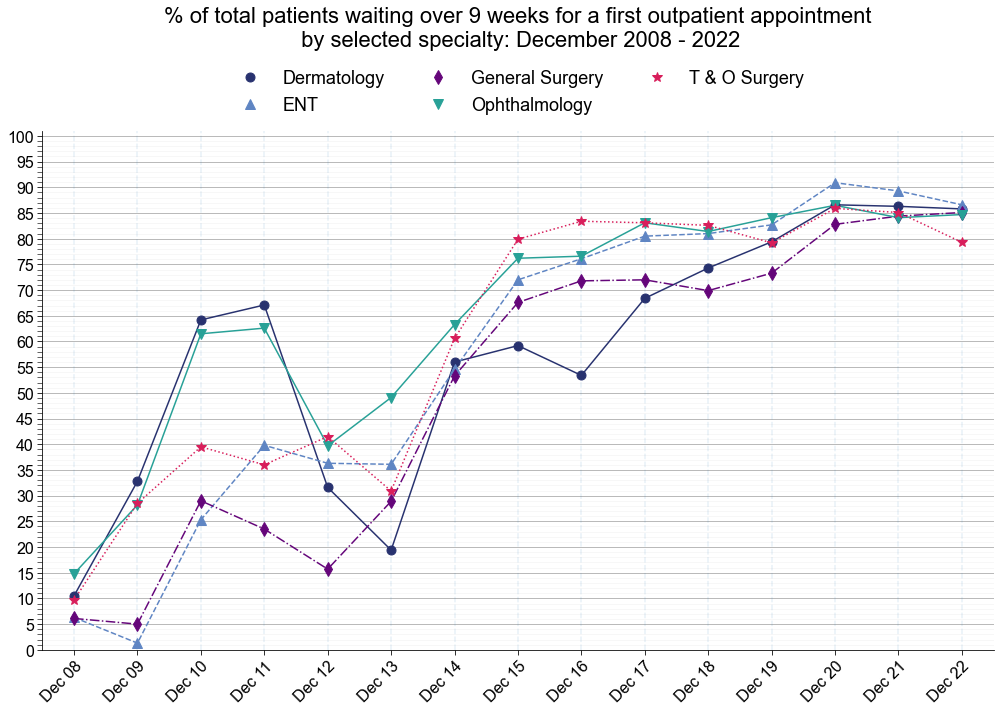

In [16]:
fig, ax = plt.subplots(figsize=(14,10))

major_ticks = np.arange(0,101,5)
minor_ticks = np.arange(0,101,1)
dates=['Dec 08','Dec 09','Dec 10','Dec 11','Dec 12','Dec 13','Dec 14','Dec 15','Dec 16','Dec 17','Dec 18','Dec 19','Dec 20','Dec 21','Dec 22',]

ax.set_xlim([-0.5,14.5])

#fmt = '{x:,.0f}'
#tick = mtick.StrMethodFormatter(fmt)
#ax.yaxis.set_major_formatter(tick) 
#e=list_reverse(c,len(c))
pl1 = plt.errorbar(dates,df2['% waiting over 9 weeks'], label='Dermatology', fmt='.',color=colors[0],markersize=18)
pl5 = plt.plot(dates,df2['% waiting over 9 weeks'],linestyle='solid',color=colors[0])

pl1 = plt.errorbar(dates,df4['% waiting over 9 weeks'], label='ENT', fmt='^',color=colors[1],markersize=10)
pl5 = plt.plot(dates,df4['% waiting over 9 weeks'],linestyle='--',color=colors[1])

pl1 = plt.errorbar(dates,df6['% waiting over 9 weeks'], label='General Surgery', fmt='d',color=colors[2],markersize=10)
pl5 = plt.plot(dates,df6['% waiting over 9 weeks'],linestyle='-.',color=colors[2])

pl1 = plt.errorbar(dates,df8['% waiting over 9 weeks'], label='Ophthalmology', fmt='v',color=colors[3],markersize=10)
pl5 = plt.plot(dates,df8['% waiting over 9 weeks'],linestyle='-',color=colors[3])

pl1 = plt.errorbar(dates,df10['% waiting over 9 weeks'], label='T & O Surgery', fmt='*',color=colors[4],markersize=10)
pl5 = plt.plot(dates,df10['% waiting over 9 weeks'],linestyle=':',color=colors[4])

ax.legend(loc='upper center', frameon=False, fontsize=18,ncol=3,bbox_to_anchor=(0.5,1.15))
plt.yticks(rotation=0, fontsize=16)
plt.xticks(rotation=45,ha='right', rotation_mode="anchor", fontsize=16)
ax.set_axisbelow(True)
right_side = ax.spines["right"]
top_side = ax.spines["top"]
#left_side = ax.spines["left"]
bottom_side=ax.spines["bottom"]
right_side.set_visible(False)
top_side.set_visible(False)
#left_side.set_visible(True)
#left_side.set_visible(False)
ax.tick_params(axis='x', which='both', length=5)
ax.tick_params(axis='y', which='both', length=5)
#plt.tick_params(labelleft=False, left=False)
for i in range(0, len(d)+1):
    plt.axvline(x=i,alpha=0.1, linestyle='--')

#plt.axvline(x=10,alpha=0.5, linestyle='-', color='grey')
    
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)
ax.yaxis.grid(True, which='major',color='darkgrey')
ax.yaxis.grid(True, which='minor',color='darkgrey', alpha=0.1)

ax.set_ylim([0,101])

#ax.annotate('Grey line indicates status at \ntime of last update', xy=(10.25,14),fontsize=14, color='grey')
    
plt.title('% of total patients waiting over 9 weeks for a first outpatient appointment\n by selected specialty: December 2008 - 2022', fontsize=22, pad=85)
plt.savefig('C:/Users/Aaron/Untitled Folder/Assembly Code/Janice/image4.png',bbox_inches='tight')
#plt.plot()
fig.tight_layout()

In [17]:
def data_get(stringy):
    perc=[]
    for i in range(0, len(months[0:60:4])):
        percent=sum(december.loc[(df["Specialty"]==stringy) & (df["Quarter"]==(months[0:60:4][i]))]['Over 52 Weeks'])/sum(december.loc[(df["Specialty"]==stringy) & (df["Quarter"]==(months[0:60:4][i]))]['Total Waiting'])
        #print(percent)
        perc.append(round((100*percent),1))
    percentile_list2 = pd.DataFrame(
        {'% waiting over 52 weeks': perc,
         'Month':months[0:60:4],
        })
    #percentile_list2 = percentile_list2[percentile_list2.Month != '31-Dec-15']
    percentile_list2 = percentile_list2[percentile_list2.Month != '31-Dec-14']
    percentile_list2 = percentile_list2[percentile_list2.Month != '31-Dec-13']
    percentile_list2 = percentile_list2[percentile_list2.Month != '31-Dec-12']
    percentile_list2 = percentile_list2[percentile_list2.Month != '31-Dec-11']
    percentile_list2 = percentile_list2[percentile_list2.Month != '31-Dec-10']
    percentile_list2 = percentile_list2[percentile_list2.Month != '31-Dec-09']
    percentile_list2 = percentile_list2[percentile_list2.Month != '31-Dec-08']
    
    return percentile_list2.iloc[::-1]

rheuma=data_get('Rheumatology')

oral=data_get("Oral Surgery")

neuro=data_get("Neurology")

plastic=data_get("Plastic Surgery")

painmgt=data_get("Pain Management")

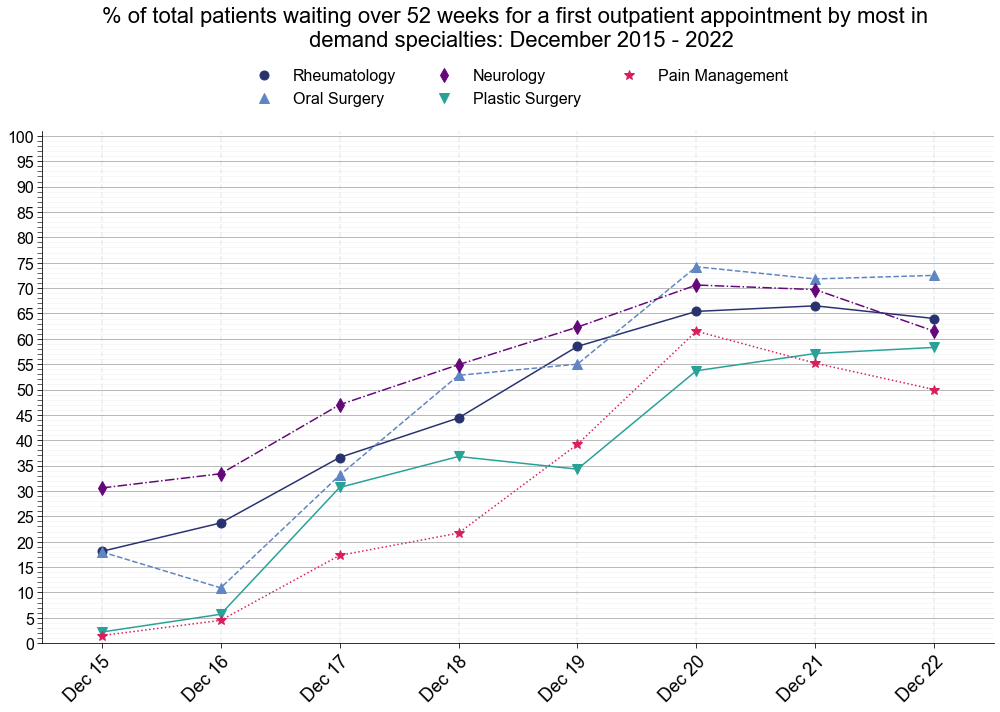

In [18]:
fig, ax = plt.subplots(figsize=(14,10))

major_ticks = np.arange(0,101,5)
minor_ticks = np.arange(0,101,1)

dates=['Dec 15','Dec 16','Dec 17','Dec 18','Dec 19','Dec 20','Dec 21','Dec 22']
ax.set_xlim([-0.5,7.5])

#fmt = '{x:,.0f}'
#tick = mtick.StrMethodFormatter(fmt)
#ax.yaxis.set_major_formatter(tick) 
#e=list_reverse(c,len(c))
pl1 = plt.errorbar(dates,rheuma['% waiting over 52 weeks'], label='Rheumatology', fmt='.',color=colors[0],markersize=18)
pl5 = plt.plot(dates,rheuma['% waiting over 52 weeks'],linestyle='solid',color=colors[0])

pl1 = plt.errorbar(dates,oral['% waiting over 52 weeks'], label='Oral Surgery', fmt='^',color=colors[1],markersize=10)
pl5 = plt.plot(dates,oral['% waiting over 52 weeks'],linestyle='--',color=colors[1])

pl1 = plt.errorbar(dates,neuro['% waiting over 52 weeks'], label='Neurology', fmt='d',color=colors[2],markersize=10)
pl5 = plt.plot(dates,neuro['% waiting over 52 weeks'],linestyle='-.',color=colors[2])

pl1 = plt.errorbar(dates,plastic['% waiting over 52 weeks'], label='Plastic Surgery', fmt='v',color=colors[3],markersize=10)
pl5 = plt.plot(dates,plastic['% waiting over 52 weeks'],linestyle='-',color=colors[3])

pl1 = plt.errorbar(dates,painmgt['% waiting over 52 weeks'], label='Pain Management', fmt='*',color=colors[4],markersize=10)
pl5 = plt.plot(dates,painmgt['% waiting over 52 weeks'],linestyle=':',color=colors[4])

ax.legend(loc='upper center', frameon=False, fontsize=16,ncol=3,bbox_to_anchor=(0.5,1.15))
plt.yticks(rotation=0, fontsize=16)
plt.xticks(rotation=45,ha='right', rotation_mode="anchor", fontsize=18)
ax.set_axisbelow(True)
right_side = ax.spines["right"]
top_side = ax.spines["top"]
#left_side = ax.spines["left"]
bottom_side=ax.spines["bottom"]
right_side.set_visible(False)
top_side.set_visible(False)
#left_side.set_visible(True)
#left_side.set_visible(False)
ax.tick_params(axis='x', which='both', length=5)
ax.tick_params(axis='y', which='both', length=5)
#plt.tick_params(labelleft=False, left=False)
for i in range(0, len(d)+1):
    plt.axvline(x=i,alpha=0.1, linestyle='--')

ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)
ax.yaxis.grid(True, which='major',color='darkgrey')
ax.yaxis.grid(True, which='minor',color='darkgrey', alpha=0.1)

ax.set_ylim([0,101])
    
plt.title('% of total patients waiting over 52 weeks for a first outpatient appointment by most in \n demand specialties: December 2015 - 2022', fontsize=22, pad=85)
plt.savefig('C:/Users/Aaron/Untitled Folder/Assembly Code/Janice/image5.png',bbox_inches='tight')
#plt.plot()
fig.tight_layout()

In [19]:


def data_get_old(stringy):
    perc=[]
    for i in range(0, len(months[0:60:4])):
        percent=sum(december.loc[(df["Specialty"]==stringy) & (df["Quarter"]==(months[0:60:4][i]))]['Over 52 Weeks'])/sum(december.loc[(df["Specialty"]==stringy) & (df["Quarter"]==(months[0:60:4][i]))]['Total Waiting'])
        #print(percent)
        perc.append(round((100*percent),1))
    percentile_list2 = pd.DataFrame(
        {'% waiting over 52 weeks': perc,
         'Month':months[0:60:4],
        })
    
    return percentile_list2.iloc[::-1]

derm=data_get('Dermatology')

ent=data_get("ENT")

general=data_get("General Surgery")

opthamology=data_get("Ophthalmology")

tosur=data_get("T & O Surgery")


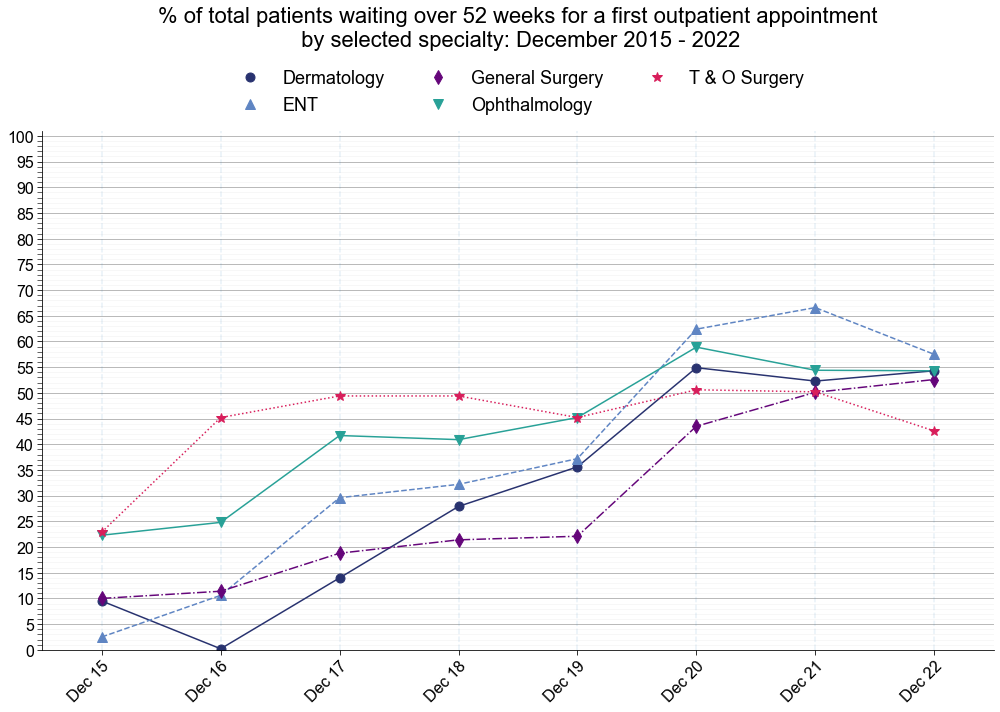

In [20]:
fig, ax = plt.subplots(figsize=(14,10))

major_ticks = np.arange(0,101,5)
minor_ticks = np.arange(0,101,1)

dates=['Dec 15','Dec 16','Dec 17','Dec 18','Dec 19','Dec 20','Dec 21','Dec 22']
ax.set_xlim([-0.5,7.5])

#fmt = '{x:,.0f}'
#tick = mtick.StrMethodFormatter(fmt)
#ax.yaxis.set_major_formatter(tick) 
#e=list_reverse(c,len(c))
pl1 = plt.errorbar(dates,derm['% waiting over 52 weeks'], label='Dermatology', fmt='.',color=colors[0],markersize=18)
pl5 = plt.plot(dates,derm['% waiting over 52 weeks'],linestyle='solid',color=colors[0])

pl1 = plt.errorbar(dates,ent['% waiting over 52 weeks'], label='ENT', fmt='^',color=colors[1],markersize=10)
pl5 = plt.plot(dates,ent['% waiting over 52 weeks'],linestyle='--',color=colors[1])

pl1 = plt.errorbar(dates,general['% waiting over 52 weeks'], label='General Surgery', fmt='d',color=colors[2],markersize=10)
pl5 = plt.plot(dates,general['% waiting over 52 weeks'],linestyle='-.',color=colors[2])

pl1 = plt.errorbar(dates,opthamology['% waiting over 52 weeks'], label='Ophthalmology', fmt='v',color=colors[3],markersize=10)
pl5 = plt.plot(dates,opthamology['% waiting over 52 weeks'],linestyle='-',color=colors[3])

pl1 = plt.errorbar(dates,tosur['% waiting over 52 weeks'], label='T & O Surgery', fmt='*',color=colors[4],markersize=10)
pl5 = plt.plot(dates,tosur['% waiting over 52 weeks'],linestyle=':',color=colors[4])

ax.legend(loc='upper center', frameon=False, fontsize=18,ncol=3,bbox_to_anchor=(0.5,1.15))
plt.yticks(rotation=0, fontsize=16)
plt.xticks(rotation=45,ha='right', rotation_mode="anchor", fontsize=16)
ax.set_axisbelow(True)
right_side = ax.spines["right"]
top_side = ax.spines["top"]
#left_side = ax.spines["left"]
bottom_side=ax.spines["bottom"]
right_side.set_visible(False)
top_side.set_visible(False)
#left_side.set_visible(True)
#left_side.set_visible(False)
ax.tick_params(axis='x', which='both', length=5)
ax.tick_params(axis='y', which='both', length=5)
#plt.tick_params(labelleft=False, left=False)
for i in range(0, len(d)+1):
    plt.axvline(x=i,alpha=0.1, linestyle='--')

#plt.axvline(x=10,alpha=0.5, linestyle='-', color='grey')
    
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)
ax.yaxis.grid(True, which='major',color='darkgrey')
ax.yaxis.grid(True, which='minor',color='darkgrey', alpha=0.1)

ax.set_ylim([0,101])

#ax.annotate('Grey line indicates status at \ntime of last update', xy=(10.25,14),fontsize=14, color='grey')
    
plt.title('% of total patients waiting over 52 weeks for a first outpatient appointment\n by selected specialty: December 2015 - 2022', fontsize=22, pad=85)
plt.savefig('C:/Users/Aaron/Untitled Folder/Assembly Code/Janice/image6.png',bbox_inches='tight')
#plt.plot()
fig.tight_layout()

In [21]:
new_df=pd.read_csv("C:/Users/Aaron/Untitled Folder/Assembly Code/outpatients2022totals.csv")
new_df=new_df.fillna(0)
new_df["Quarter"]=new_df["Quarter"].str.replace(r'-', ' ', regex=True)
new_df["Quarter"]=new_df["Quarter"].str.replace(r'30', '', regex=True)
new_df["Quarter"]=new_df["Quarter"].str.replace(r'31', '', regex=True)

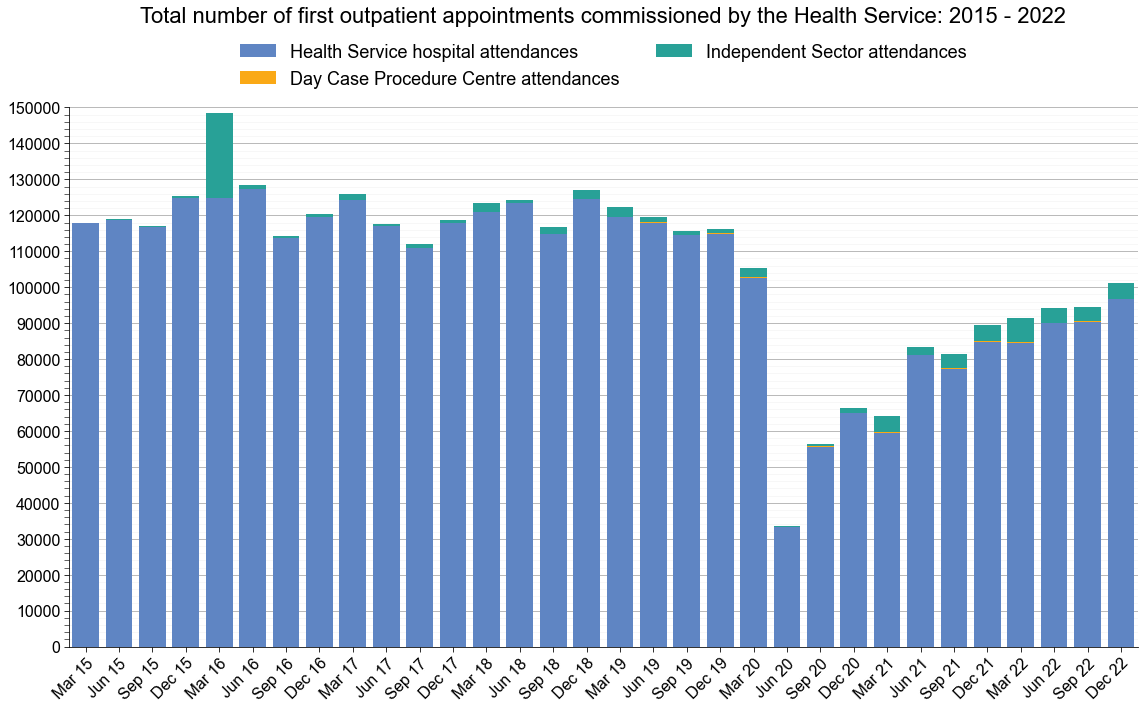

In [22]:
fig, ax = plt.subplots(figsize=(16,10))

major_ticks = np.arange(0,160001,10000)
minor_ticks = np.arange(0,160001,2000)

x = new_df['Quarter']
y1 = new_df['Health Service hospital attendances']
y2 = new_df['Day Case Procedure Centre attendances']
y3 = new_df['Independent Sector attendances']

ax.set_xlim([26.5,58.5])

pl1 = plt.bar(x, y1, color=colors[1], label='Health Service hospital attendances')
pl5 = plt.bar(x, y2, bottom=y1, color=colors[6], label='Day Case Procedure Centre attendances')
pl7 = plt.bar(x, y3, bottom=y1+y2, color=colors[3], label='Independent Sector attendances')

ax.legend(loc='upper center', frameon=False, fontsize=18,ncol=2,bbox_to_anchor=(0.5,1.15))

plt.yticks(rotation=0, fontsize=16)
plt.xticks(rotation=45,ha='right', rotation_mode="anchor", fontsize=16)
ax.set_axisbelow(True)
right_side = ax.spines["right"]
top_side = ax.spines["top"]

#left_side = ax.spines["left"]

bottom_side=ax.spines["bottom"]

right_side.set_visible(False)
top_side.set_visible(False)
#left_side.set_visible(True)
#left_side.set_visible(False)

ax.tick_params(axis='x', which='both', length=5)
ax.tick_params(axis='y', which='both', length=5)
#plt.tick_params(labelleft=False, left=False)

#plt.axvline(x=10,alpha=0.5, linestyle='-', color='grey')
    
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)
ax.yaxis.grid(True, which='major',color='darkgrey')
ax.yaxis.grid(True, which='minor',color='darkgrey', alpha=0.1)

ax.set_ylim([0,150001])

#ax.annotate('Grey line indicates status at \ntime of last update', xy=(10.25,14),fontsize=14, color='grey')
    
plt.title('Total number of first outpatient appointments commissioned by the Health Service: 2015 - 2022', fontsize=22, pad=85)
plt.savefig('C:/Users/Aaron/Untitled Folder/Assembly Code/Janice/image7.png',bbox_inches='tight')
#plt.plot()
fig.tight_layout()

In [23]:
new_df_icat=pd.read_csv("C:/Users/Aaron/Untitled Folder/Assembly Code/Janice/icats2.csv")
new_df_icat=new_df_icat.fillna(0)
new_df_icat["Quarter Ending"]=new_df_icat["Quarter Ending"].str.replace(r'-', ' ', regex=True)
new_df_icat["Quarter Ending"]=new_df_icat["Quarter Ending"].str.replace(r'30', '', regex=True)
new_df_icat["Quarter Ending"]=new_df_icat["Quarter Ending"].str.replace(r'31', '', regex=True)

In [24]:
new_df_icat

,Quarter Ending,HSC Trust,Programme of Care,Specialty,0-6 weeks,>6-9 weeks,>9-12 weeks,>12-15 weeks,>15-18 weeks,>18 weeks,>9 weeks,Total Waiting
0,Jun 11,Belfast,Acute Services,Dermatology,63,4,1,2,0,1,4,71
1,Jun 11,Belfast,Acute Services,Ophthalmology,16,0,6,12,44,0,62,78
2,Jun 11,Belfast,Acute Services,T & O Surgery,464,77,7,0,1,10,18,559
3,Jun 11,Northern,Acute Services,Dermatology,195,56,32,22,17,9,80,331
4,Jun 11,Northern,Acute Services,ENT,244,53,11,1,0,0,12,309
...,...,...,...,...,...,...,...,...,...,...,...,...
812,Mar 23,South Eastern,Acute Services,T & O Surgery,795,283,201,112,177,1651,2141,3219
813,Mar 23,Southern,Acute Services,ENT,55,10,17,11,9,72,109,174
814,Mar 23,Southern,Acute Services,T & O Surgery,838,286,230,137,257,1806,2430,3554
815,Mar 23,Western,Acute Services,Ophthalmology,168,68,107,39,55,860,1061,1297


In [25]:
months=new_df_icat['Quarter Ending'].unique()
months[2:60:4]
specialty=new_df_icat['Specialty'].unique()
trust=new_df_icat['HSC Trust'].unique()

In [26]:
dates=months[2:60:4]
print(dates)

[' Dec 11' ' Dec 12' ' Dec 13' ' Dec 14' ' Dec 15' ' Dec 16' ' Dec 17'
 ' Dec 18' ' Dec 19' ' Dec 20' ' Dec 21' ' Dec 22']


In [27]:
def clean_plot_2(path,label1, label2,title1,savepath,list_dates):
    df=pd.read_csv(path)
    months=df['Quarter Ending'].unique()
    months[2:60:4]
    df.fillna(0)

    december=df.loc[(df["Quarter Ending"]==(months[2:60:4][0]))
                 | (df["Quarter Ending"]==(months[2:60:4][1]))
                    | (df["Quarter Ending"]==(months[2:60:4][2]))
                       | (df["Quarter Ending"]==(months[2:60:4][3]))
                          | (df["Quarter Ending"]==(months[2:60:4][4]))
                             | (df["Quarter Ending"]==(months[2:60:4][5]))
                                | (df["Quarter Ending"]==(months[2:60:4][6]))
                                   | (df["Quarter Ending"]==(months[2:60:4][7]))
                                      | (df["Quarter Ending"]==(months[2:60:4][8]))
                                         | (df["Quarter Ending"]==(months[2:60:4][9]))
                                            | (df["Quarter Ending"]==(months[2:60:4][10]))
                                               | (df["Quarter Ending"]==(months[2:60:4][11]))]
    total_waiting=[]
    waiting_over_9=[]

    #print(len(months[2:60:4]))
    for i in range(0, len(months[2:60:4])):
        dec_tot=sum(december.loc[(df["Quarter Ending"]==(months[2:60:4][i]))]['Total Waiting'].astype(int))

        dec_tot_over_9=sum(december.loc[(df["Quarter Ending"]==(months[2:60:4][i]))]['>9 weeks'].astype(int))

        dec_tot_over_52=sum(december.loc[(df["Quarter Ending"]==(months[2:60:4][i]))]['>9 weeks'].astype(int))

        number=dec_tot-dec_tot_over_9

        total_waiting.append(dec_tot)
        waiting_over_9.append(dec_tot_over_9)

    
    c=list_dates
    a=total_waiting
    b=waiting_over_9

    fig, ax = plt.subplots(figsize=(14,8))
    fmt = '{x:,.0f}'
    tick = mtick.StrMethodFormatter(fmt)
    ax.yaxis.set_major_formatter(tick) 
    pl1 = plt.errorbar(c,a, fmt='.',color=colors[0], label=label1,markersize=18)
    pl2 = plt.errorbar(c,b, fmt='^',color=colors[1], label=label2,markersize=10)
    pl5 = plt.plot(c,a,linestyle='solid',color=colors[0])
    pl6 = plt.plot(c,b,linestyle='--',color=colors[1])
    
    #print(c,a)
    #print(c,b)
    
    ax.legend(loc='upper center', frameon=False, fontsize=18,ncol=1,bbox_to_anchor=(0.5,1.15))

    plt.yticks(rotation=0, fontsize=16)
    plt.xticks(rotation=45,ha='right', rotation_mode="anchor", fontsize=16)
    ax.set_axisbelow(True)

    right_side = ax.spines["right"]
    top_side = ax.spines["top"]
    left_side = ax.spines["left"]
    bottom_side=ax.spines["bottom"]
    right_side.set_visible(False)
    top_side.set_visible(False)
    left_side.set_visible(False)
    left_side.set_visible(False)
    ax.tick_params(axis='x', which='both', length=5)
    ax.tick_params(axis='y', which='both', length=0)

    for i in range(0,len(total_waiting)):
        if i<len(total_waiting):
            ax.annotate("{:,}".format(a[i]), xy=(i-0.25, total_waiting[i]+2000), fontsize=14, alpha=0.75)
            ax.annotate("{:,}".format(b[i]), xy=(i-0.25, waiting_over_9[i]+2000), fontsize=14, alpha=0.75)
            
        else:
            ax.annotate("{:,}".format(a[i]), xy=(i-0.25, total_waiting[i]+2000), fontsize=14, alpha=0.75)
            ax.annotate("{:,}".format(b[i]), xy=(i-0.25, waiting_over_9[i]+2000), fontsize=14, alpha=0.75)      
            
    plt.tick_params(labelleft=False, left=False)
    
    for i in range(0, len(total_waiting)+1):
        plt.axvline(x=i-0.5,alpha=0.1, linestyle='--')
    ax.set_ylim([0,30000])
    plt.title(title1, fontsize=22, pad=65)
    plt.savefig(savepath,bbox_inches='tight')
    plt.plot()
    fig.tight_layout()
    return a,b,c

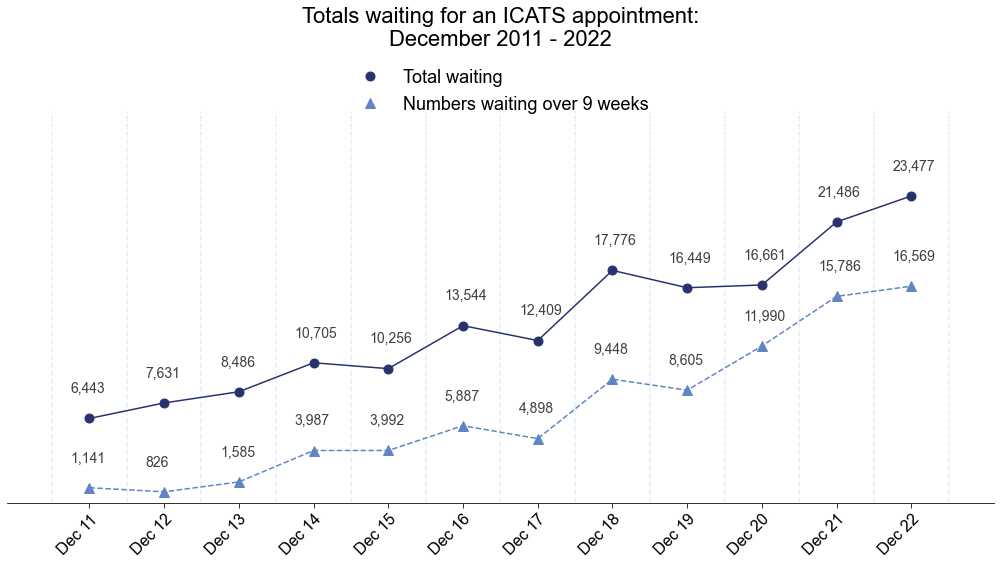

In [28]:
path="C:/Users/Aaron/Untitled Folder/Assembly Code/Janice/icats2.csv"
savepath="C:/Users/Aaron/Untitled Folder/Assembly Code/Janice/image8.png"
label1='Total waiting'
label2='Numbers waiting over 9 weeks'
title1='Totals waiting for an ICATS appointment:\nDecember 2011 - 2022'
a,b,c=clean_plot_2(path,label1, label2, title1,savepath,dates)

In [29]:
df=pd.read_csv("C:/Users/Aaron/Untitled Folder/Assembly Code/inpatient2.csv")

In [30]:
df

,Unnamed: 0,Management,Quarter,HSC Trust,Specialty,Under 13 Weeks,Between 13 and 52 Weeks,Over 52 Weeks,Total Waiting Over 13 Weeks,Total Waiting,Percent Over 13 Weeks,Percent Over 52 Weeks
0,1.0,Day Case,31-Dec-22,Belfast,Cardiology,286,306.0,151.0,457,743,61.50%,20.30%
1,2.0,Day Case,31-Dec-22,Belfast,Dermatology,44,14.0,12.0,26,70,37.10%,17.10%
2,3.0,Day Case,31-Dec-22,Belfast,Endocrinology,2,4.0,98.0,102,104,98.10%,94.20%
3,4.0,Day Case,31-Dec-22,Belfast,ENT,424,722.0,4522.0,5244,5668,92.50%,79.80%
4,5.0,Day Case,31-Dec-22,Belfast,Gastroenterology,810,677.0,1023.0,1700,2510,67.70%,40.80%
...,...,...,...,...,...,...,...,...,...,...,...,...
9192,9193.0,Inpatient,30-Jun-07,Western,Urology,50,NaN,NaN,0,69,27.50%,NaN
9193,9194.0,Inpatient,30-Jun-07,Belfast,Child & Adolescent Psychiatry,1,NaN,NaN,0,1,0.00%,NaN
9194,9195.0,Inpatient,30-Jun-07,Belfast,Mental Illness,7,NaN,NaN,0,7,0.00%,NaN
9195,9196.0,Inpatient,30-Jun-07,Belfast,Psychotherapy,14,NaN,NaN,0,14,0.00%,NaN


In [31]:
months=df['Quarter'].unique()
months[3:60:4]
specialty=df['Specialty'].unique()
trust=df['HSC Trust'].unique()
df.fillna(0)

,Unnamed: 0,Management,Quarter,HSC Trust,Specialty,Under 13 Weeks,Between 13 and 52 Weeks,Over 52 Weeks,Total Waiting Over 13 Weeks,Total Waiting,Percent Over 13 Weeks,Percent Over 52 Weeks
0,1.0,Day Case,31-Dec-22,Belfast,Cardiology,286,306.0,151.0,457,743,61.50%,20.30%
1,2.0,Day Case,31-Dec-22,Belfast,Dermatology,44,14.0,12.0,26,70,37.10%,17.10%
2,3.0,Day Case,31-Dec-22,Belfast,Endocrinology,2,4.0,98.0,102,104,98.10%,94.20%
3,4.0,Day Case,31-Dec-22,Belfast,ENT,424,722.0,4522.0,5244,5668,92.50%,79.80%
4,5.0,Day Case,31-Dec-22,Belfast,Gastroenterology,810,677.0,1023.0,1700,2510,67.70%,40.80%
...,...,...,...,...,...,...,...,...,...,...,...,...
9192,9193.0,Inpatient,30-Jun-07,Western,Urology,50,0.0,0.0,0,69,27.50%,0
9193,9194.0,Inpatient,30-Jun-07,Belfast,Child & Adolescent Psychiatry,1,0.0,0.0,0,1,0.00%,0
9194,9195.0,Inpatient,30-Jun-07,Belfast,Mental Illness,7,0.0,0.0,0,7,0.00%,0
9195,9196.0,Inpatient,30-Jun-07,Belfast,Psychotherapy,14,0.0,0.0,0,14,0.00%,0


In [32]:
months[0:60:4][0]

'31-Dec-22'

In [33]:
list_dates=['Dec 08',
            'Dec 09',
            'Dec 10',
            'Dec 11',
            'Dec 12',
            'Dec 13',
            'Dec 14',
            'Dec 15',
            'Dec 16',
            'Dec 17',
            'Dec 18',
            'Dec 19',
            'Dec 20',
            'Dec 21',
            'Dec 22']


In [34]:
def new_clean_plot(path,label1, label2,label3,title1,savepath,listdates):
    df=pd.read_csv(path)
    months=df['Quarter'].unique()
    #months[0:60:4]
    df.fillna(0)
    a=[]
    b=[]
    c=[]
    d=[]
    f=[]
    g=[]
    fi=[]
    december=df.loc[(df["Quarter"]==(months[0:60:4][0]))
                 | (df["Quarter"]==(months[0:60:4][1]))
                    | (df["Quarter"]==(months[0:60:4][2]))
                       | (df["Quarter"]==(months[0:60:4][3]))
                          | (df["Quarter"]==(months[0:60:4][4]))
                             | (df["Quarter"]==(months[0:60:4][5]))
                                | (df["Quarter"]==(months[0:60:4][6]))
                                   | (df["Quarter"]==(months[0:60:4][7]))
                                      | (df["Quarter"]==(months[0:60:4][8]))
                                         | (df["Quarter"]==(months[0:60:4][9]))
                                            | (df["Quarter"]==(months[0:60:4][10]))
                                               | (df["Quarter"]==(months[0:60:4][11]))
                                                  | (df["Quarter"]==(months[0:60:4][12]))
                                                     | (df["Quarter"]==(months[0:60:4][13]))
                                                       | (df["Quarter"]==(months[0:60:4][14]))]

    total_waiting=[]
    waiting_over_13=[]
    waiting_over_52=[]
    #print(len(months[0:60:4]))
    dec_tot=0
    dec_tot_over_13=0
    dec_tot_over52=0
    for i in range(0, len(months[0:60:4])):
        dec_tot=sum(december.loc[(df["Quarter"]==(months[0:60:4][i]))]['Total Waiting'].astype(int))
        dec_tot_over_13=sum(december.loc[(df["Quarter"]==(months[0:60:4][i]))]['Total Waiting Over 13 Weeks'].astype(int))
        dec_tot_over_52=sum(december.loc[(df["Quarter"]==(months[0:60:4][i]))]['Over 52 Weeks'].fillna(0).astype(int))
        
        total_waiting.append(dec_tot)
        waiting_over_13.append(dec_tot_over_13)
        waiting_over_52.append(dec_tot_over_52)

    c=list_dates

    a=list_reverse(total_waiting,len(total_waiting))
    b=list_reverse(waiting_over_13,len(waiting_over_13))

    q=list_reverse(waiting_over_52, len(waiting_over_52))
    b[0]=4370
    b[1]=6010
    b[2]=17156
    b[3]=24168
    b[4]=18354
    b[5]=15915
    b[6]=23393
    b[7]=35113
    #c=list_reverse(list_dates,len(list_dates))
    #b[0]=5831
    #b[1]=15715
    #b[2]=54472
    #b[3]=59378
    #b[4]=35336
    #b[5]=38261
    #b[6]=95437
    #print(b)
    percent_waiting=[]
    percent_waiting_52=[]
    for i in range(0, len(b)):
        percent_waiting.append(100*(b[i]/a[i]))
        percent_waiting_52.append(100*(q[i]/a[i]))
        
    d=percent_waiting
    g=percent_waiting_52
    fig, ax = plt.subplots(figsize=(14,8))

    major_ticks = np.arange(0,150001,10000)
    minor_ticks = np.arange(0,150001,5000)
    ax.set_ylim([0,150001])
    f=list_dates.copy()
    fi=list_dates.copy()
    f.pop(0)
    f.pop(0)
    f.pop(0)
    f.pop(0)
    f.pop(0)
    f.pop(0)
    f.pop(0)
    f.pop(0)
    f.pop(0)
    q.pop(0)
    q.pop(0)
    q.pop(0)
    q.pop(0)
    q.pop(0)
    q.pop(0)
    q.pop(0)
    q.pop(0)
    q.pop(0)

        
    
    
    #print(f,q,c,a)
    fmt = '{x:,.0f}'
    tick = mtick.StrMethodFormatter(fmt)
    ax.yaxis.set_major_formatter(tick) 
    print(c,a)
    pl1 = plt.errorbar(c,a, fmt='.',color=colors[0], label=label1,markersize=18)
    pl2 = plt.errorbar(fi,b, fmt='^',color=colors[1], label=label2,markersize=10)
    pl3 = plt.errorbar(f,q, fmt='d',color=colors[2], label=label3,markersize=10)
    
    pl5 = plt.plot(c,a,linestyle='solid',color=colors[0])
    pl6 = plt.plot(fi,b,linestyle='--',color=colors[1])
    pl6 = plt.plot(f,q,linestyle='-.',color=colors[2])
    
    ax.legend(loc='upper center', frameon=False, fontsize=18,ncol=1,bbox_to_anchor=(0.5,1.15))

    #ax.set_yticks(major_ticks,color='darkgrey')
    #ax.set_yticks(minor_ticks, minor=True)

    #ax.yaxis.grid(True, which='major',color='darkgrey')
    #ax.yaxis.grid(True, which='minor',color='darkgrey', alpha=0.5)

    plt.yticks(rotation=0, fontsize=16)
    plt.xticks(rotation=45,ha='right', rotation_mode="anchor", fontsize=16)
    ax.set_axisbelow(True)

    right_side = ax.spines["right"]
    top_side = ax.spines["top"]
    left_side = ax.spines["left"]
    bottom_side=ax.spines["bottom"]
    right_side.set_visible(False)
    top_side.set_visible(False)
    left_side.set_visible(False)
    left_side.set_visible(False)
    ax.tick_params(axis='x', which='both', length=5)
    ax.tick_params(axis='y', which='both', length=0)

    for i in range(0,len(total_waiting)):
        if i<len(total_waiting)-1:
            ax.annotate("{:,}".format(total_waiting[i]), xy=(i-0.4, total_waiting[i]+7500), fontsize=14, alpha=0.75)           
        else:
            ax.annotate("{:,}".format(total_waiting[i]), xy=(i-0.4, total_waiting[i]+7500), fontsize=14, alpha=0.75)
            
    for i in range(0, len(b)):
        if i<len(total_waiting)-1:
            ax.annotate("{:,}".format(waiting_over_13[i]), xy=(i-0.4, waiting_over_13[i]+7500), fontsize=14, alpha=0.75)
        else:
            ax.annotate("{:,}".format(waiting_over_13[i]), xy=(i-0.4, waiting_over_13[i]+7500), fontsize=14, alpha=0.75)
        
    for i in range(0,len(waiting_over_52)):
        if i<len(waiting_over_52)-1:
            ax.annotate("{:,}".format(waiting_over_52[i]), xy=(i+9-0.4, waiting_over_52[i]+7500), fontsize=14, alpha=0.75)
        else:            
            ax.annotate("{:,}".format(waiting_over_52[i]), xy=(i+9-0.4, waiting_over_52[i]+7500), fontsize=14, alpha=0.75)
            
       
    plt.tick_params(labelleft=False, left=False)
    for i in range(0, len(total_waiting)+1):
        plt.axvline(x=i-0.5,alpha=0.1, linestyle='--')
    
    plt.title(title1, fontsize=22, pad=65)
    plt.savefig(savepath,bbox_inches='tight')
    plt.plot()
    fig.tight_layout()
    return a,b,c,d,q,g,f

['Dec 08', 'Dec 09', 'Dec 10', 'Dec 11', 'Dec 12', 'Dec 13', 'Dec 14', 'Dec 15', 'Dec 16', 'Dec 17', 'Dec 18', 'Dec 19', 'Dec 20', 'Dec 21', 'Dec 22'] [36972, 36808, 50769, 56470, 51211, 48673, 54209, 67026, 70782, 78440, 88605, 90514, 105159, 120097, 122267]


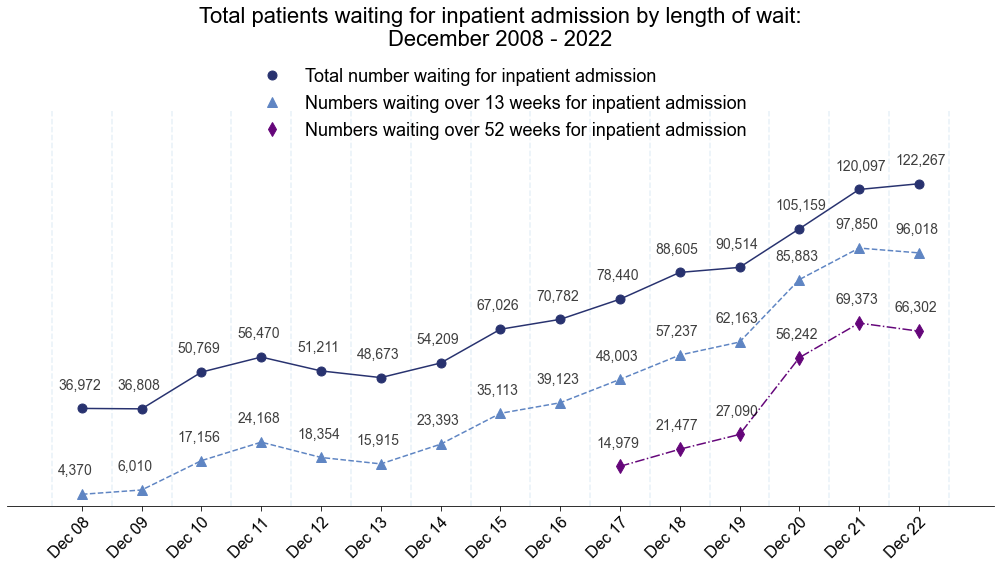

In [35]:
path="C:/Users/Aaron/Untitled Folder/Assembly Code/inpatient2.csv"
savepath="C:/Users/Aaron/Untitled Folder/Assembly Code/Janice/image9.png"
label1='Total number waiting for inpatient admission'
label2='Numbers waiting over 13 weeks for inpatient admission'
label3= 'Numbers waiting over 52 weeks for inpatient admission'
title1='Total patients waiting for inpatient admission by length of wait:\nDecember 2008 - 2022'
a,b,c,d,q,g,f=new_clean_plot(path,label1, label2,label3, title1,savepath,list_dates)

In [36]:


g.pop(0)
g.pop(0)
g.pop(0)
g.pop(0)
g.pop(0)
g.pop(0)
g.pop(0)
g.pop(0)
g.pop(0)

11.9663191206804

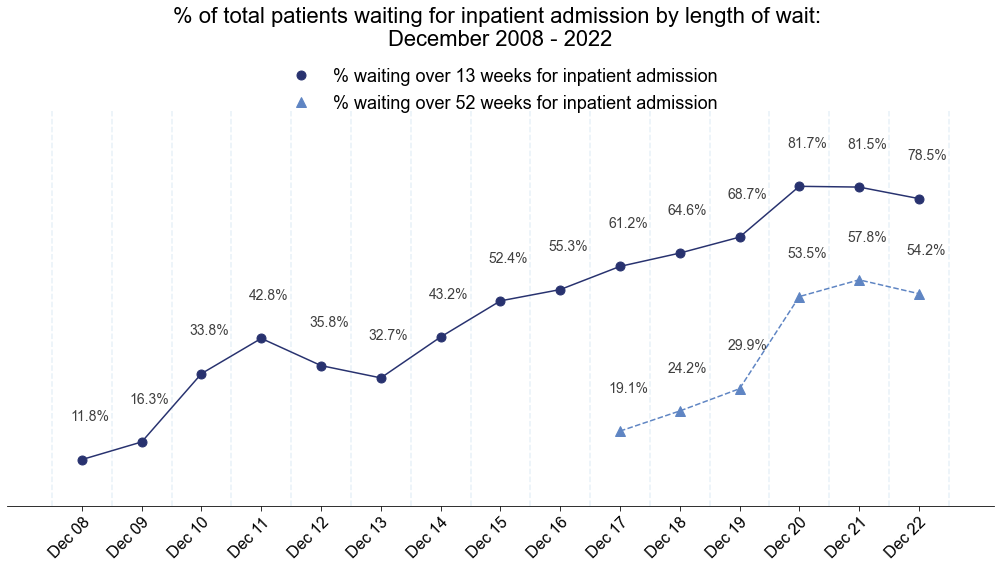

In [37]:
label2='% waiting over 13 weeks for inpatient admission'
label3= '% waiting over 52 weeks for inpatient admission'

fig, ax = plt.subplots(figsize=(14,8))
major_ticks = np.arange(0,101,10)
minor_ticks = np.arange(0,101,5)
ax.set_ylim([0,101])
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
pl1 = plt.errorbar(c,d, fmt='.',color=colors[0],label=label2, markersize=18)
pl2 = plt.errorbar(f,g, fmt='^',color=colors[1],label=label3,markersize=10)
pl5 = plt.plot(c,d,linestyle='solid',color=colors[0])
pl4 = plt.plot(f,g,linestyle='--',color=colors[1])
#ax.legend(loc='upper center', frameon=False, fontsize=16,ncol=1,bbox_to_anchor=(0.5,1.15))
plt.yticks(rotation=0, fontsize=16)
plt.xticks(rotation=45,ha='right', rotation_mode="anchor", fontsize=16)
ax.set_axisbelow(True)
right_side = ax.spines["right"]
top_side = ax.spines["top"]
left_side = ax.spines["left"]
bottom_side=ax.spines["bottom"]
right_side.set_visible(False)
top_side.set_visible(False)
left_side.set_visible(False)
left_side.set_visible(False)
ax.tick_params(axis='x', which='both', length=5)
ax.tick_params(axis='y', which='both', length=0)
for i in range(0,len(d)):
    ax.annotate(str(round(d[i],1))+'%', xy=(i-0.2,d[i]+10), fontsize=14, alpha=0.75)
for i in range(0,len(g)):
    ax.annotate(str(round(g[i],1))+'%', xy=(i+9-0.2,g[i]+10), fontsize=14, alpha=0.75)
plt.tick_params(labelleft=False, left=False)
for i in range(0, len(d)+1):
    plt.axvline(x=i-0.5,alpha=0.1, linestyle='--')
ax.legend(loc='upper center', frameon=False, fontsize=18,ncol=1,bbox_to_anchor=(0.5,1.15))
plt.title('% of total patients waiting for inpatient admission by length of wait: \nDecember 2008 - 2022', fontsize=22, pad=65)
plt.savefig('C:/Users/Aaron/Untitled Folder/Assembly Code/Janice/image10.png',bbox_inches='tight')
plt.plot()
fig.tight_layout()

In [791]:
df=pd.read_csv("C:/Users/Aaron/Untitled Folder/Assembly Code/diagnostic.csv")

In [792]:
df

,Unnamed: 0,Quarter,HSC Trust,< 9 Weeks,> 9 Weeks,9 - 26 Weeks,> 26 Weeks,Total,% > 9 Weeks,% > 26 Weeks
0,1,Sep-22,Belfast,17320,21387,9215,12172,38707,55.3%,31.4%
1,2,Sep-22,Northern,18498,15814,9298,6516,34312,46.1%,19.0%
2,3,Sep-22,South Eastern,15990,12607,8245,4362,28597,44.1%,15.3%
3,4,Sep-22,Southern,14526,26034,10021,16013,40560,64.2%,39.5%
4,5,Sep-22,Western,11141,10621,5488,5133,21762,48.8%,23.6%
...,...,...,...,...,...,...,...,...,...,...
200,201,Sep-12,Belfast,15685,9712,7388,2324,25397,38.2%,9.2%
201,202,Sep-12,Northern,9451,1469,1452,17,10920,13.5%,0.2%
202,203,Sep-12,South Eastern,7455,335,331,4,7790,4.3%,0.1%
203,204,Sep-12,Southern,9720,1037,778,259,10757,9.6%,2.4%


In [793]:
months=df['Quarter'].unique()

df.fillna(0)

,Unnamed: 0,Quarter,HSC Trust,< 9 Weeks,> 9 Weeks,9 - 26 Weeks,> 26 Weeks,Total,% > 9 Weeks,% > 26 Weeks
0,1,Sep-22,Belfast,17320,21387,9215,12172,38707,55.3%,31.4%
1,2,Sep-22,Northern,18498,15814,9298,6516,34312,46.1%,19.0%
2,3,Sep-22,South Eastern,15990,12607,8245,4362,28597,44.1%,15.3%
3,4,Sep-22,Southern,14526,26034,10021,16013,40560,64.2%,39.5%
4,5,Sep-22,Western,11141,10621,5488,5133,21762,48.8%,23.6%
...,...,...,...,...,...,...,...,...,...,...
200,201,Sep-12,Belfast,15685,9712,7388,2324,25397,38.2%,9.2%
201,202,Sep-12,Northern,9451,1469,1452,17,10920,13.5%,0.2%
202,203,Sep-12,South Eastern,7455,335,331,4,7790,4.3%,0.1%
203,204,Sep-12,Southern,9720,1037,778,259,10757,9.6%,2.4%


In [794]:
months[3:60:4]

array(['Dec-21', 'Dec-20', 'Dec-19', 'Dec-18', 'Dec-17', 'Dec-16',
       'Dec-15', 'Dec-14', 'Dec-13', 'Dec-12'], dtype=object)

In [795]:
df['Total']

0      38707
1      34312
2      28597
3      40560
4      21762
       ...  
200    25397
201    10920
202     7790
203    10757
204     7971
Name: Total, Length: 205, dtype: int64

['Dec 12', 'Dec 13', 'Dec 14', 'Dec 15', 'Dec 16', 'Dec 17', 'Dec 18', 'Dec 19', 'Dec 20', 'Dec 21']
[65329, 65586, 81288, 94043, 105302, 112670, 126288, 141274, 144433, 147878]


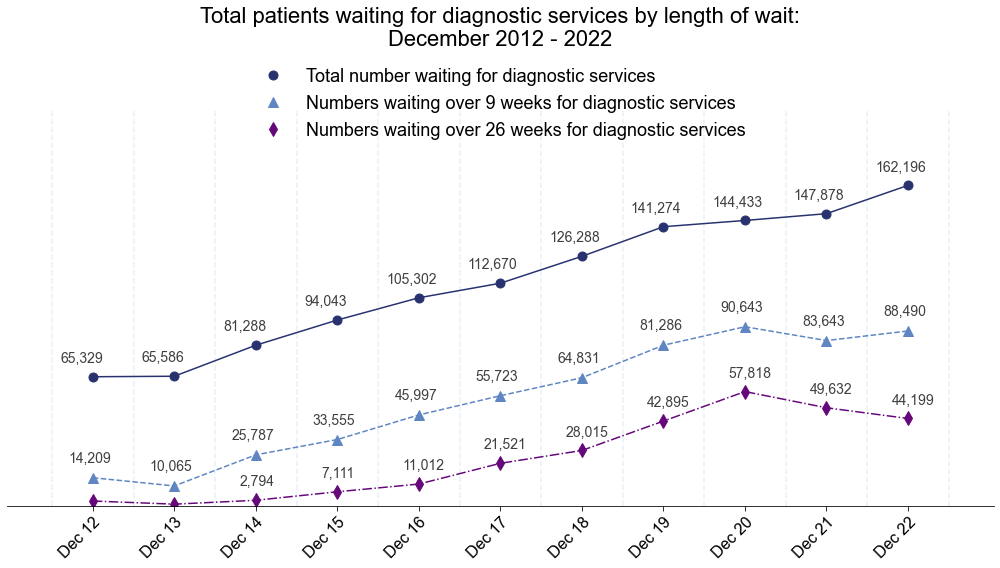

In [796]:
label1='Total number waiting for diagnostic services'
label2='Numbers waiting over 9 weeks for diagnostic services'
label3='Numbers waiting over 26 weeks for diagnostic services'
title='Total patients waiting for diagnostic services by length of wait:\nDecember 2012 - 2022'
list_dates=['Dec 12', 'Dec 13', 'Dec 14', 'Dec 15', 'Dec 16', 'Dec 17', 'Dec 18', 'Dec 19', 'Dec 20', 'Dec 21']
december=df.loc[(df["Quarter"]==(months[3:60:4][0]))
                 | (df["Quarter"]==(months[3:60:4][1]))
                    | (df["Quarter"]==(months[3:60:4][2]))
                       | (df["Quarter"]==(months[3:60:4][3]))
                          | (df["Quarter"]==(months[3:60:4][4]))
                             | (df["Quarter"]==(months[3:60:4][5]))
                                | (df["Quarter"]==(months[3:60:4][6]))
                                   | (df["Quarter"]==(months[3:60:4][7]))
                                      | (df["Quarter"]==(months[3:60:4][8]))
                                         | (df["Quarter"]==(months[3:60:4][9]))]
total_waiting=[]
waiting_over_9=[]
waiting_over_26=[]
for i in range(0, len(months[3:60:4])):
    dec_tot=sum(december.loc[(df["Quarter"]==(months[3:60:4][i]))]['Total'].astype(int))
    dec_tot_over_9=sum(december.loc[(df["Quarter"]==(months[3:60:4][i]))]['> 9 Weeks'].astype(int))
    dec_tot_over_26=sum(december.loc[(df["Quarter"]==(months[3:60:4][i]))]['> 26 Weeks'].fillna(0).astype(int))
        
    total_waiting.append(dec_tot)
    waiting_over_9.append(dec_tot_over_9)
    waiting_over_26.append(dec_tot_over_26)
    
c=list_dates
print(c)
a=list_reverse(total_waiting,len(total_waiting))
b=list_reverse(waiting_over_9,len(waiting_over_9))
q=list_reverse(waiting_over_26, len(waiting_over_26))
print(a)
a.append(162196)
c.append('Dec 22')
b.append(88490)
q.append(44199)
fig, ax = plt.subplots(figsize=(14,8))

major_ticks = np.arange(0,200001,10000)
minor_ticks = np.arange(0,200001,5000)
ax.set_ylim([0,200001])
f=list_dates.copy()
fi=list_dates.copy()
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 

pl1 = plt.errorbar(c,a, fmt='.',color=colors[0], label=label1,markersize=18)
pl2 = plt.errorbar(c,b, fmt='^',color=colors[1], label=label2,markersize=10)
pl3 = plt.errorbar(c,q, fmt='d',color=colors[2], label=label3,markersize=10)
    
pl5 = plt.plot(c,a,linestyle='solid',color=colors[0])
pl6 = plt.plot(c,b,linestyle='--',color=colors[1])
pl6 = plt.plot(c,q,linestyle='-.',color=colors[2])
    
ax.legend(loc='upper center', frameon=False, fontsize=18,ncol=1,bbox_to_anchor=(0.5,1.15))

plt.yticks(rotation=0, fontsize=16)
plt.xticks(rotation=45,ha='right', rotation_mode="anchor", fontsize=16)
ax.set_axisbelow(True)

right_side = ax.spines["right"]
top_side = ax.spines["top"]
left_side = ax.spines["left"]
bottom_side=ax.spines["bottom"]
right_side.set_visible(False)
top_side.set_visible(False)
left_side.set_visible(False)
left_side.set_visible(False)
ax.tick_params(axis='x', which='both', length=5)
ax.tick_params(axis='y', which='both', length=0)

for i in range(0,len(total_waiting)):
    if i<len(total_waiting)-1:
        ax.annotate("{:,}".format(total_waiting[i]), xy=(i-0.4, total_waiting[i]+7500), fontsize=14, alpha=0.75)           
    else:
        ax.annotate("{:,}".format(total_waiting[i]), xy=(i-0.4, total_waiting[i]+7500), fontsize=14, alpha=0.75)
            
for i in range(0, len(b)):
    if i<len(total_waiting)-1:
        ax.annotate("{:,}".format(waiting_over_9[i]), xy=(i-0.3, waiting_over_9[i]+8000), fontsize=14, alpha=0.75)
    else:
        ax.annotate("{:,}".format(waiting_over_9[i]), xy=(i-0.3, waiting_over_9[i]+8000), fontsize=14, alpha=0.75)
        
for i in range(2,len(waiting_over_26)):
    if i<len(waiting_over_26)-1:
        ax.annotate("{:,}".format(waiting_over_26[i]), xy=(i-0.2, waiting_over_26[i]+7500), fontsize=14, alpha=0.75)
    else:            
        ax.annotate("{:,}".format(waiting_over_26[i]), xy=(i-0.2, waiting_over_26[i]+7500), fontsize=14, alpha=0.75)
            
            
plt.tick_params(labelleft=False, left=False)
for i in range(0, len(total_waiting)+1):
    plt.axvline(x=i-0.5,alpha=0.1, linestyle='--')
    
plt.title(title, fontsize=22, pad=65)
plt.savefig('C:/Users/Aaron/Untitled Folder/Assembly Code/Janice/image11.png',bbox_inches='tight')
plt.plot()
fig.tight_layout()



In [797]:
percent_waiting_9=[]
percent_waiting_26=[]
for i in range(0, len(b)):
    percent_waiting_9.append(100*(b[i]/a[i]))
    percent_waiting_26.append(100*(q[i]/a[i]))
        
d=percent_waiting_9
g=percent_waiting_26

[21.74991198395812, 15.346262921965053, 31.7230095463045, 35.68048658592346, 43.681031699302956, 49.45682080411822, 51.33583555048777, 57.53783427948525, 62.75781850408148, 56.562166109901405, 54.5574490123061]


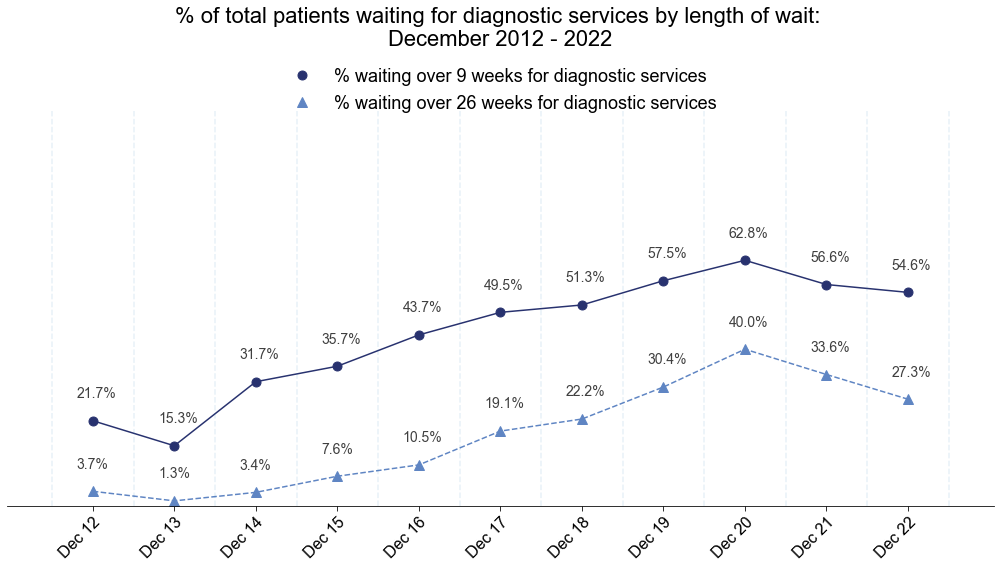

In [798]:
label2='% waiting over 9 weeks for diagnostic services'
label3= '% waiting over 26 weeks for diagnostic services'

fig, ax = plt.subplots(figsize=(14,8))
major_ticks = np.arange(0,101,10)
minor_ticks = np.arange(0,101,5)
ax.set_ylim([0,101])
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
print(d)
pl1 = plt.errorbar(c,d, fmt='.',color=colors[0],label=label2, markersize=18)
pl2 = plt.errorbar(f,g, fmt='^',color=colors[1],label=label3,markersize=10)
pl5 = plt.plot(c,d,linestyle='solid',color=colors[0])
pl4 = plt.plot(f,g,linestyle='--',color=colors[1])
#ax.legend(loc='upper center', frameon=False, fontsize=16,ncol=1,bbox_to_anchor=(0.5,1.15))
plt.yticks(rotation=0, fontsize=16)
plt.xticks(rotation=45,ha='right', rotation_mode="anchor", fontsize=16)
ax.set_axisbelow(True)
right_side = ax.spines["right"]
top_side = ax.spines["top"]
left_side = ax.spines["left"]
bottom_side=ax.spines["bottom"]
right_side.set_visible(False)
top_side.set_visible(False)
left_side.set_visible(False)
left_side.set_visible(False)
ax.tick_params(axis='x', which='both', length=5)
ax.tick_params(axis='y', which='both', length=0)
for i in range(0,len(d)):
    ax.annotate(str(round(d[i],1))+'%', xy=(i-0.2,d[i]+6), fontsize=14, alpha=0.75)
for i in range(0,len(g)):
    ax.annotate(str(round(g[i],1))+'%', xy=(i-0.2,g[i]+6), fontsize=14, alpha=0.75)
plt.tick_params(labelleft=False, left=False)
for i in range(0, len(d)+1):
    plt.axvline(x=i-0.5,alpha=0.1, linestyle='--')
ax.legend(loc='upper center', frameon=False, fontsize=18,ncol=1,bbox_to_anchor=(0.5,1.15))
plt.title('% of total patients waiting for diagnostic services by length of wait: \nDecember 2012 - 2022', fontsize=22, pad=65)
plt.savefig('C:/Users/Aaron/Untitled Folder/Assembly Code/Janice/image12.png',bbox_inches='tight')
plt.plot()
fig.tight_layout()